## 1. Introduction

In this notebook we examine the Telco Customer Churn dataset and then we build a model that can predict if a customer left the company within the last month. We start with finding feature types, missing values and we continue with feature analysis and visualization of the data. Feature engineering is implemented to create new attributes, encoding and feature selection. At last we test several classifiers and we evaluate them with the help of the ROC and CAP curves.

#### Data Dictionary
- Customers who left within the last month: Churn
- Services that each customer has signed up for: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies;  
- Customer account information: Tenure, Contract, PaymentMethod, PaperlessBilling, MonthlyCharges, TotalCharges
- Demographic info about customers: Gender, SeniorCitizen, Partner, Dependents   

#### Structure
1. Introduction
2. Data Profiling
3. Feature Analysis (Visualization)
4. Feature Engineering (Visualization)
5. Feature Engineering (Encoding)
6. Evaluation - Selection

#### Goal
The goal is to predict the behavior to retain customers.

#### P.S. 
Feel free to comment if you have any question, something to note or suggest about this notebook. It will only make us better!  

## 2. Data Profiling

In [47]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
# Importing the dataset
df_Train = pd.read_csv(r"../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Dataset Information
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 20 columns in the dataset with the below dtypes: 
float64(1): MonthlyCharges                     
int64(2): SeniorCitizen, tenure                  
object(18): gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges, Churn

We do not include customerID feature.

TotalCharges should be dtype: float64 as MonthlyCharges but instead its dtype: object

In [49]:
df_Train['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

We convert TotalCharges from object to float

In [50]:
# Convert column TotalCharger from object to float
df_Train['TotalCharges'] = df_Train['TotalCharges'].apply(pd.to_numeric,errors='coerce')

In [51]:
# Missing Values
df_Train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in TotalCharges column that we will handle later

In [52]:
# First DataFrame rows
df_Train.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


- Features
- Categorical: Binary: 'gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn'
             Nominal: 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                      'TechSupport','StreamingMovies','StreamingTV','Contract','PaymentMethod'           
- Numerical: Discrete: 'SeniorCitizen'
           Continuous: 'tenure','MonthlyCharges','TotalCharges'

In [53]:
# Describing The Data
df_Train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- tenure: Min = 0, Max = 72
- MonthlyCharges: Min = 18.25, Max = 118.75
- TotalCharges: Min = 18.8, Max = 8684.8

We notice that there are customers that they have tenure = 0. Probably that means that these customers made a contrtact with the company during the last month so their tenure is < 1 month.

## 3. Feature analysis (Visualization)

In [54]:
def autolabel(patches,ax,mode):
    if mode == 'percentage':
        """Display Percentage"""
        for j in range(len(patches)):
            rects = patches[j]
            height = rects.get_height()
            percentage = '{:.1f}%'.format(rects.get_height())       
            ax.annotate(percentage,
                        xy=(rects.get_x() + rects.get_width() / 2, height),
                        xytext=(0, 0.5),
                        textcoords="offset points",
                        ha='center', va='bottom')            
    elif mode == 'count':
        """Display Count"""
        for j in range(len(patches)):
            rects = patches[j]
            height = rects.get_height().astype('int')   
            height = height if height >= 0 else -1 # To avoid error
            ax.annotate(height,
                        xy=(rects.get_x() + rects.get_width() / 2, height),
                        xytext=(0, 0.5),
                        textcoords="offset points",
                        ha='center', va='bottom')         
               
def autoplot(X,hue,data,colors):
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    
    plt.subplot(1,2,1)
    ax[0] = sns.barplot(x=X.value_counts().index,
                        y=(X.value_counts()/len(X))*100,
                        data=data,palette='Blues_d')    
    ax[0].set_xlabel(X.name,fontsize=13)
    ax[0].set_ylabel("Percentage",fontsize=13)
    autolabel(ax[0].patches,ax[0],'percentage')
    
    plt.subplot(1,2,2)
    ax[1] = sns.countplot(x=X,hue=hue,data=df_Train,palette=colors,order = X.value_counts().index)   
    ax[1].set_ylabel("Number of Occurrences",fontsize=13)
    ax[1].set_xlabel(X.name,fontsize=13)
    autolabel(ax[1].patches,ax[1],'count')   
    
# Constants that we will use later
colors1 =['#C03028','#78C850']#Churn: No/Yes

We used the functions above to auto plot some features with annotations (percentages, counts).

### Categorial Features

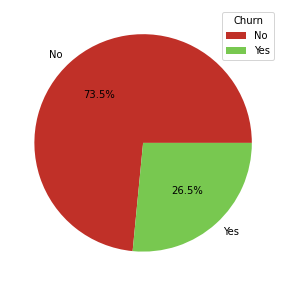

In [55]:
# Churn
Churn = pd.crosstab(df_Train['Churn'],df_Train['Churn']).sum()
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(Churn, labels=Churn.index, autopct='%1.1f%%',colors=colors1)
plt.legend(title='Churn',fontsize=10,title_fontsize=10)

26.5% left the company within the last month and 73.5% stayed. This is a case with imbalanced data.

Churn,No,Yes
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


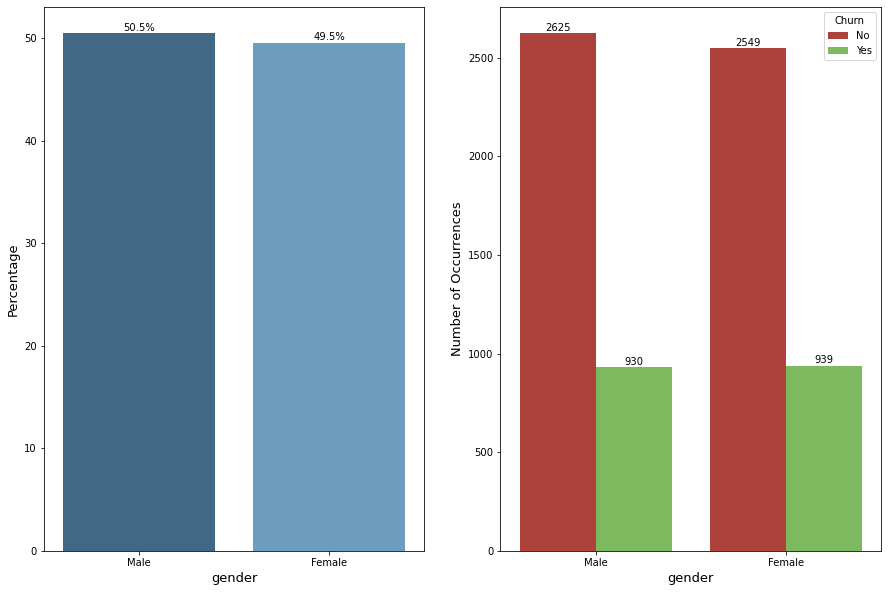

In [56]:
# Gender
autoplot(df_Train['gender'],df_Train['Churn'],df_Train,colors1)
pd.crosstab(df_Train['gender'], df_Train['Churn']).apply(lambda r: r/r.sum(),axis=1)

50.5% are men and 49.5% are women. Churning rates for men and women are similar 26.1% and 26.9% resectively. We can say that gender might not have big importance in our model.

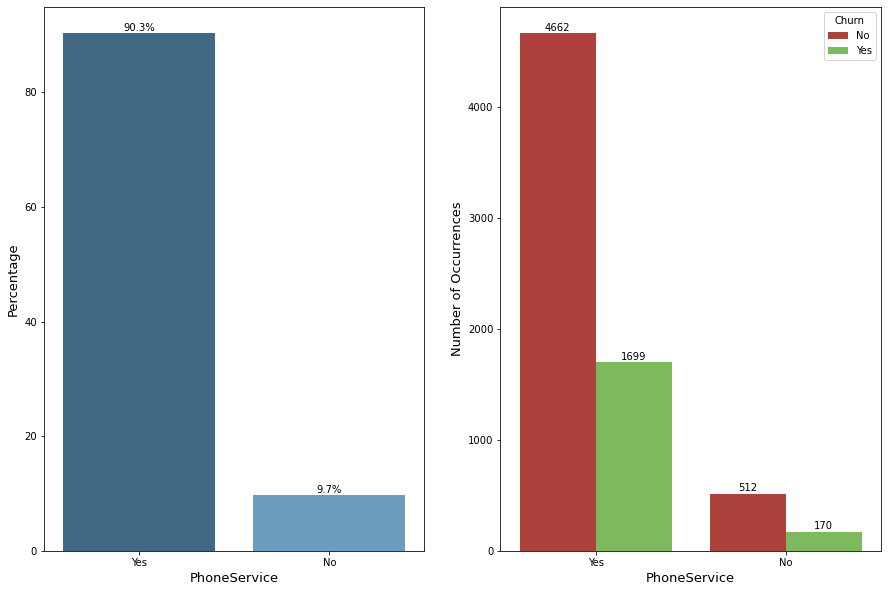

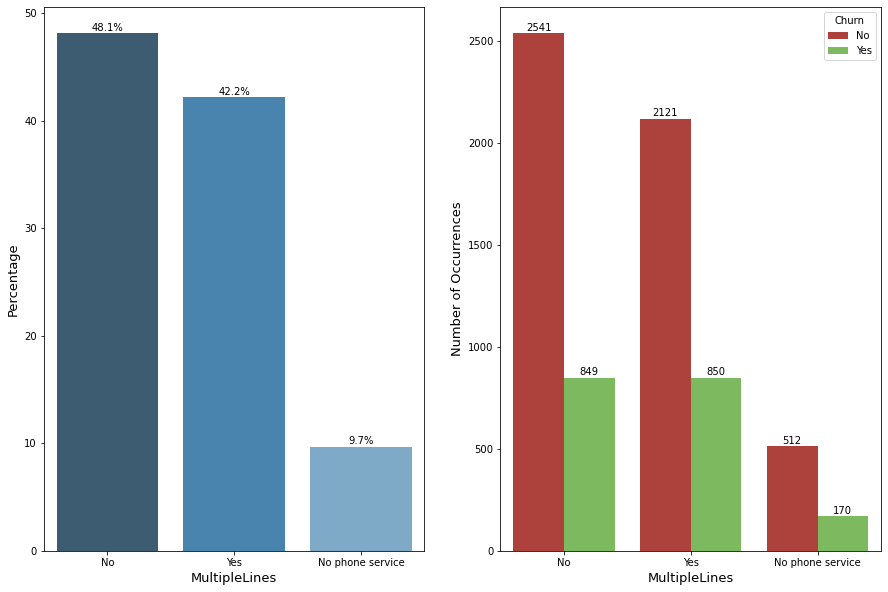

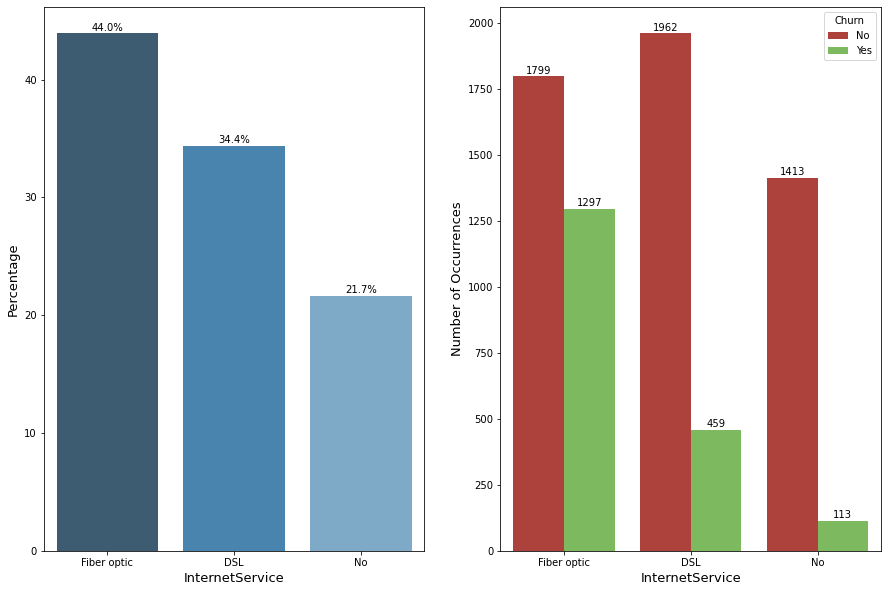

In [57]:
# PhoneService-MultipleLines-InternetService
IVs = ['PhoneService','MultipleLines','InternetService']
for i in range(len(IVs)):    
    autoplot(df_Train[IVs[i]],df_Train['Churn'],df_Train,colors1)

In [58]:
for i in range(len(IVs)):    
    print(pd.crosstab(df_Train[IVs[i]], df_Train['Churn']).apply(lambda r: r/r.sum(), axis=1))
    print('\n')

Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096


Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099


Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050




- The Churning percentages for customers having a PhoneService (90.3%) or not (9.7%) are similar, 24.9% and 26.7% respectively. PhoneService feature seems not to have a big importance for our model.

- 42.2% of the customers do not have MultipleLines and 48.1% have. Churning percentages are similar 25% and 28.6%. Also the information of having a PhoneService or not is included in MultipleLines feature.

- 21.7% have not Internet Service and most of them stayed in the company, only 0.07% of the customers left. For those that had Fiber Optic as an Internet Service 41.8% Churned.

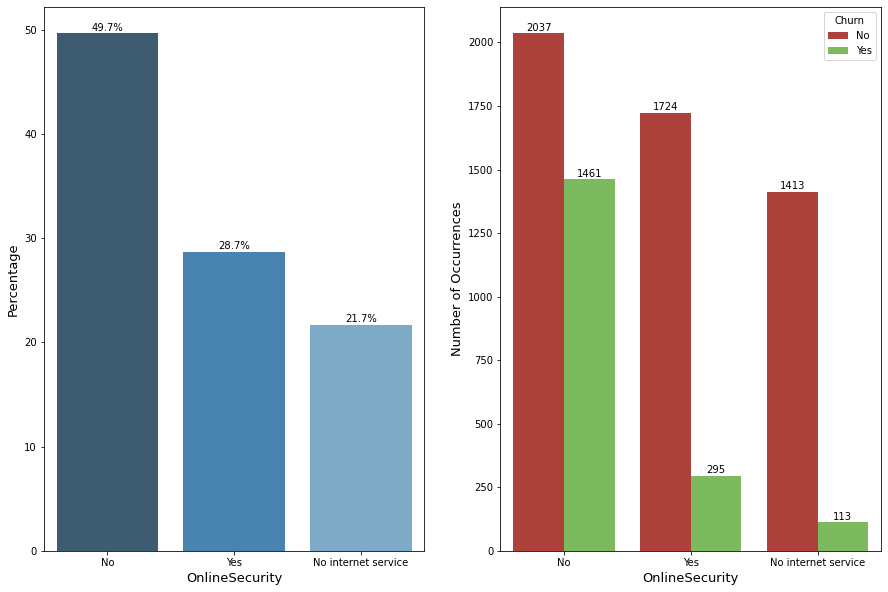

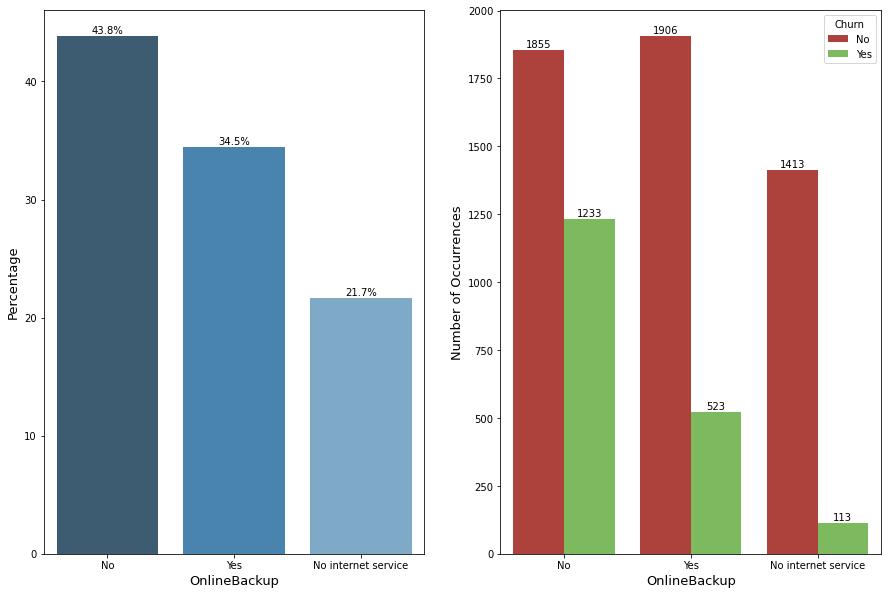

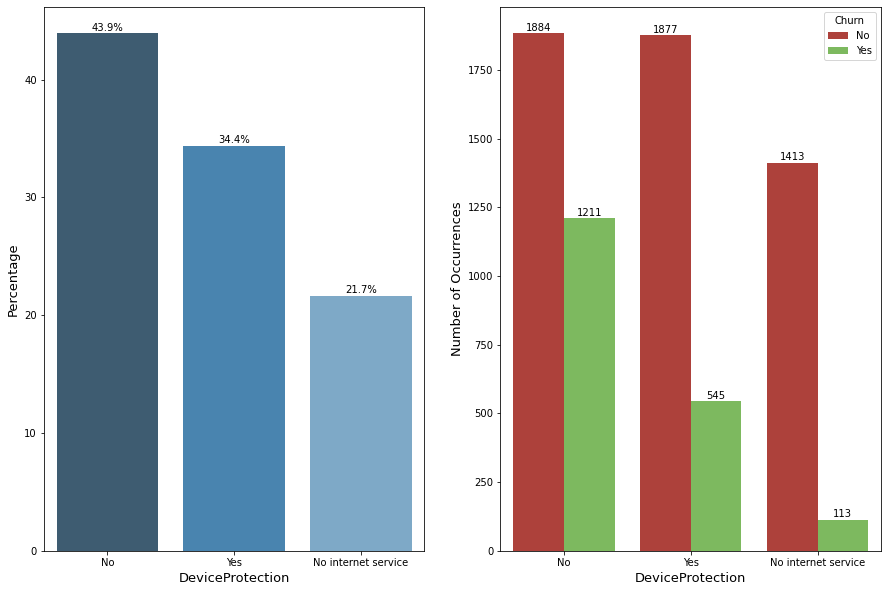

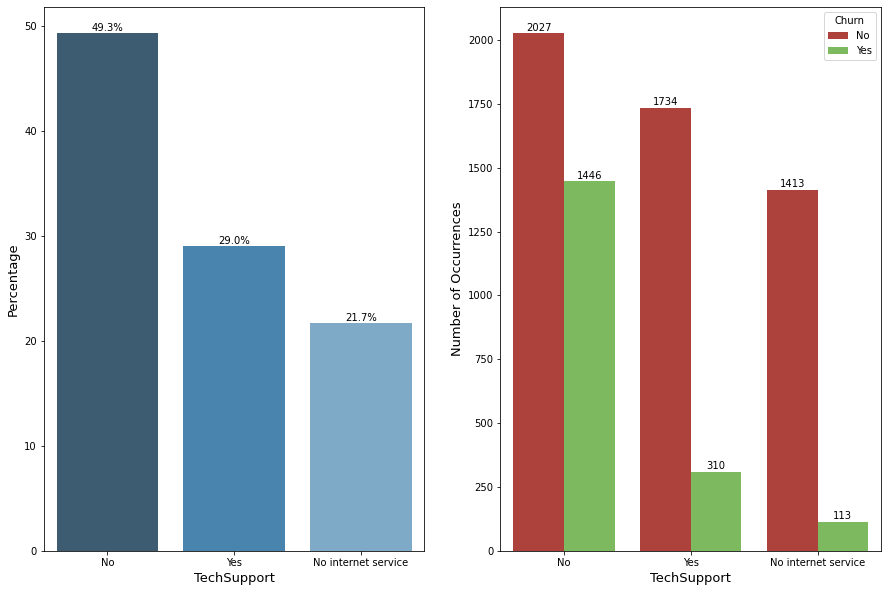

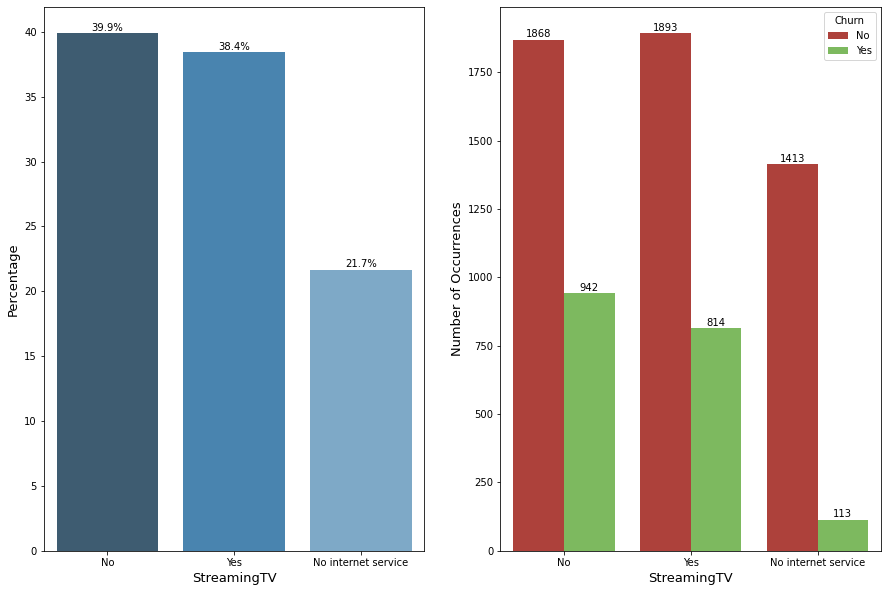

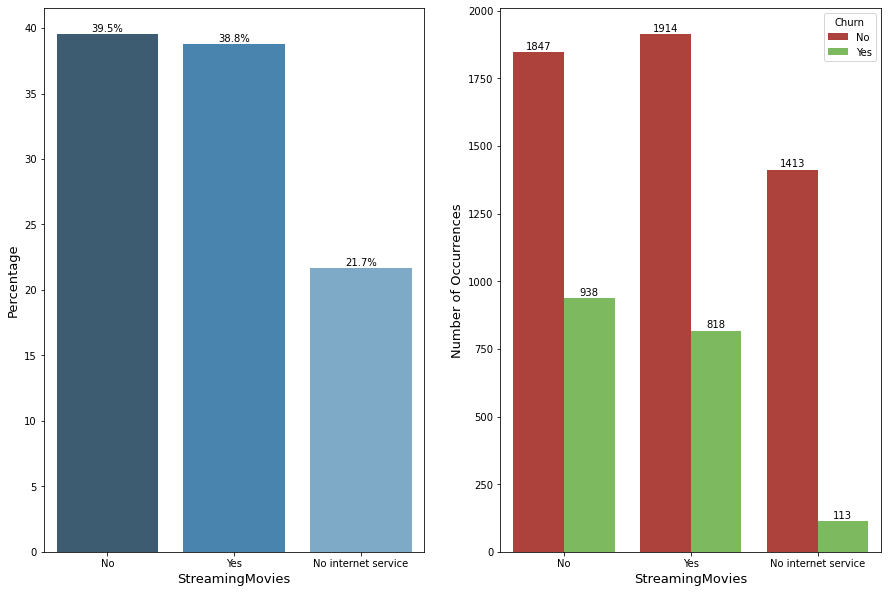

In [59]:
# OnlineSecurity-OnlineBackup-DeviceProtection-TechSupport-StreamingTV-StreamingMovies
IVs = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in range(len(IVs)):
    autoplot(df_Train[IVs[i]],df_Train['Churn'],df_Train,colors1)

In [60]:
for i in range(len(IVs)):
    print(pd.crosstab(df_Train[IVs[i]], df_Train['Churn']).apply(lambda r: r/r.sum(), axis=1))
    print('\n')

Churn                      No       Yes
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112


Churn                      No       Yes
OnlineBackup                           
No                   0.600712  0.399288
No internet service  0.925950  0.074050
Yes                  0.784685  0.215315


Churn                      No       Yes
DeviceProtection                       
No                   0.608724  0.391276
No internet service  0.925950  0.074050
Yes                  0.774979  0.225021


Churn                      No       Yes
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663


Churn                      No       Yes
StreamingTV                            
No                   0.664769  0.335231
No internet service  0.925950  0.074050
Yes                  0.699298  0

- As mentioned before, 21.7% have not Internet Service so no Online Services as well and most of them stayed in the company, only 0.07% left.

- Features: 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
- 49.7% has not 'OnlineSecurity' and 41.7% left the company.
- 43.8% has not 'OnlineBackup' and 39.9% left the company.
- 43.9% has not 'DeviceProtection' and 39.1% left the company.
- 49.3% has not 'TechSupport' and 41.6% left the company.

- Features: 'StreamingTV','StreamingMovies'
- The percentages of having or not these Online Services are similar.
- 1/3 of the customers left the company despite having or not 'StreamingTV' and 'StreamingMovies'

- We can say in general that, customers having an Internet Service but not Online Services tend to leave.

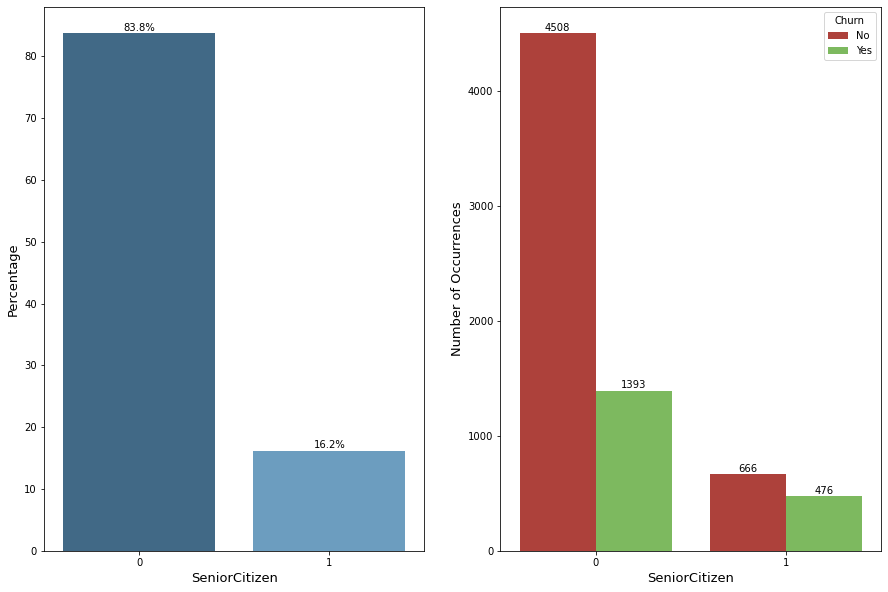

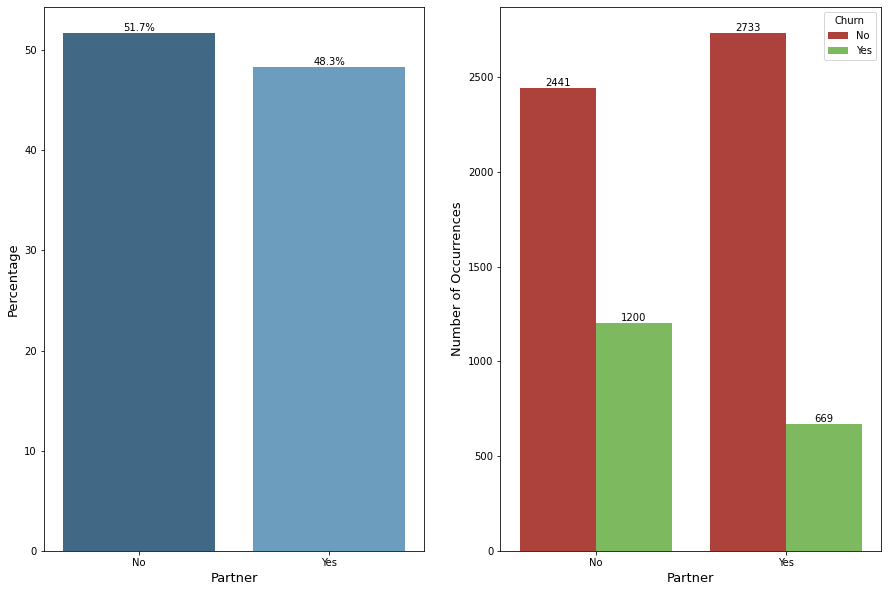

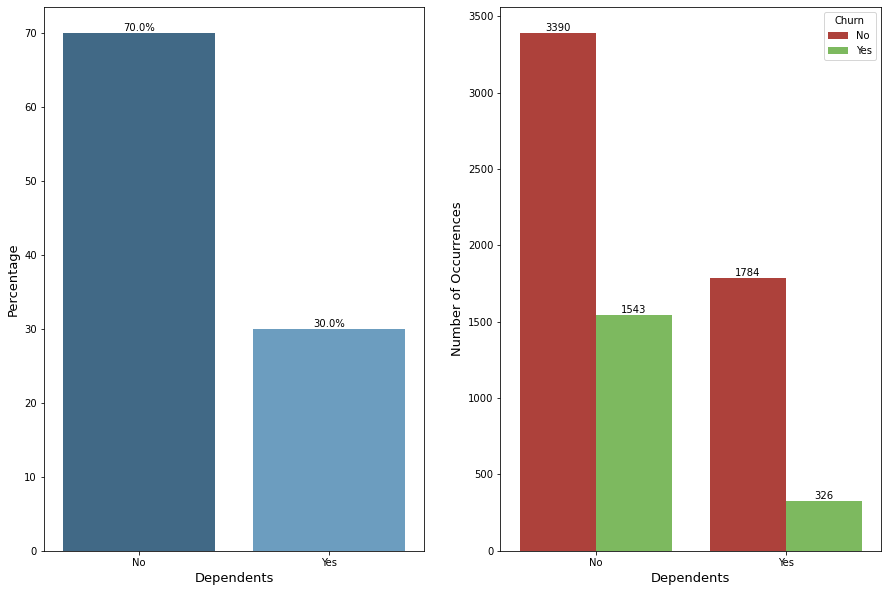

In [61]:
#SeniorCitizen-Partner-Dependents
IVs = ['SeniorCitizen','Partner','Dependents']
for i in range(len(IVs)):
    autoplot(df_Train[IVs[i]],df_Train['Churn'],df_Train,colors1)

In [62]:
for i in range(len(IVs)):
    print(pd.crosstab(df_Train[IVs[i]], df_Train['Churn']).apply(lambda r: r/r.sum(), axis=1))
    print('\n')

Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649


Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502




- Only 16.2% are Senior Citizens but 41.6% left the company in comparison with the non Senior Sitizens where 23.6% Churned
- In comparison, 23.6% of the non Senior Citizens customers left the company.

- Customers with and without Partner have similar percentages 48.3% and 51.7% respectively but 32.9% without a Partner Churned and 19.6% with a Partner Churned.

- 70% has no Dependents - 31% of these customers Churned while 15.4% of the customers with Dependents Chruned.

- Being a Senior Citizen, not having a Partner or Dependents increase the chance for a customer to leave the company.

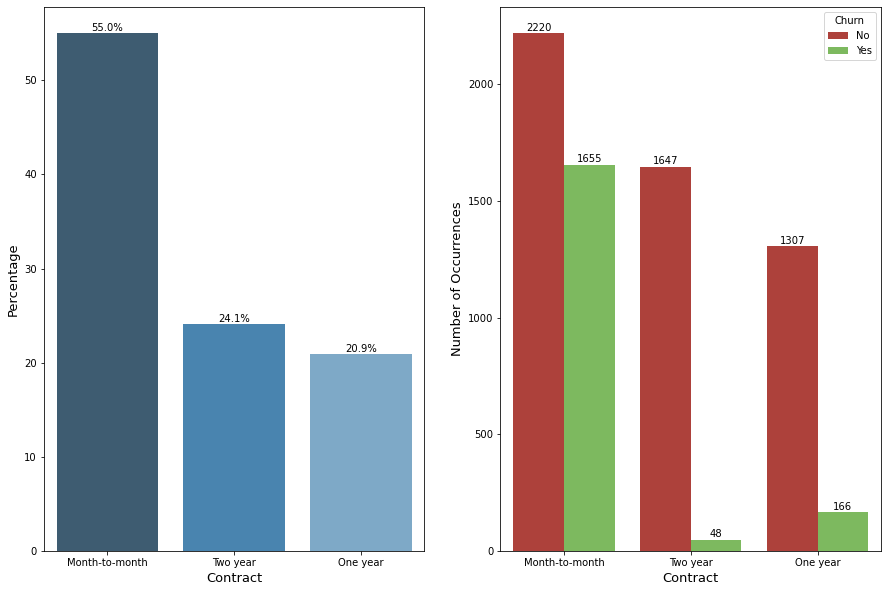

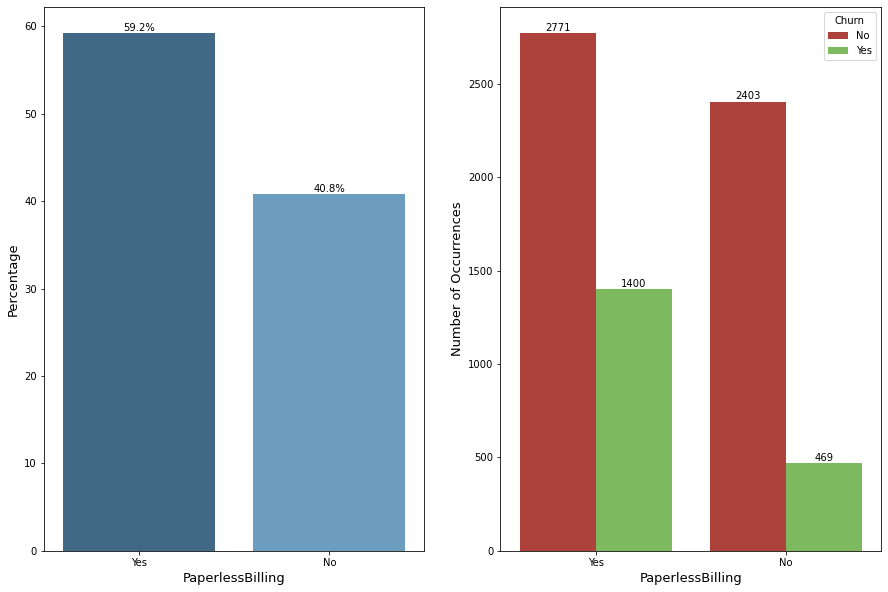

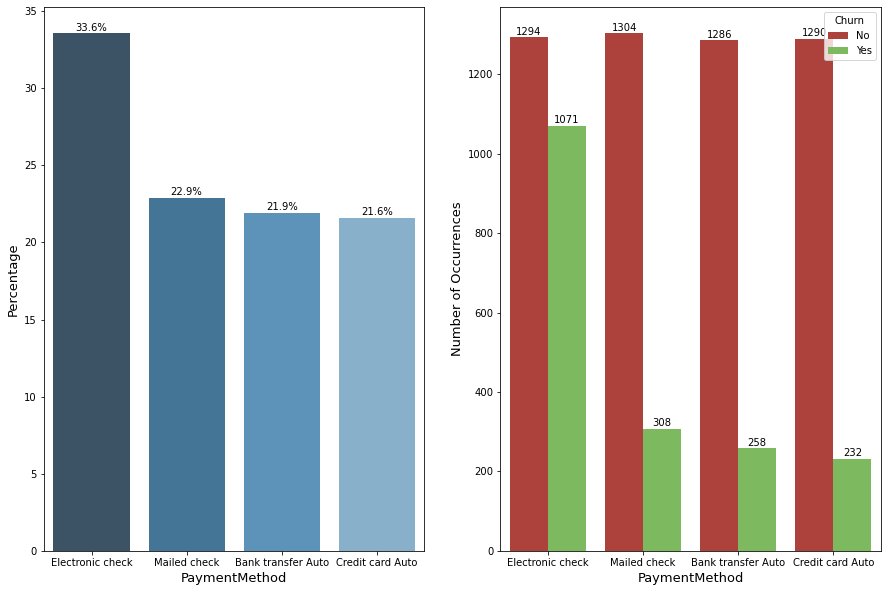

In [63]:
# Contract-PaperlessBilling-PaymentMethod
IVs = ['Contract','PaperlessBilling','PaymentMethod']
df_Train['PaymentMethod'] = df_Train['PaymentMethod'].replace({'Bank transfer (automatic)':'Bank transfer Auto',
                                                               'Credit card (automatic)':'Credit card Auto'})
for i in range(len(IVs)):    
    autoplot(df_Train[IVs[i]],df_Train['Churn'],df_Train,colors1)

In [64]:
for i in range(len(IVs)):    
    print(pd.crosstab(df_Train[IVs[i]], df_Train['Churn']).apply(lambda r: r/r.sum(), axis=1))
    print('\n')

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


Churn                   No       Yes
PaperlessBilling                    
No                0.836699  0.163301
Yes               0.664349  0.335651


Churn                     No       Yes
PaymentMethod                         
Bank transfer Auto  0.832902  0.167098
Credit card Auto    0.847569  0.152431
Electronic check    0.547146  0.452854
Mailed check        0.808933  0.191067




- 55% has Month to Month contract as well as the highest percentage of Churning 42.7%.

- 59.2% has PaperlessBilling and 33.5% of these customers Churned compared to 16.3% for those who do not have PaperlessBilling.

- 45.2% of the customers using Electronic Check as a Payment Methon Churned. 

- Having a Month to Month contract, PaperlessBilling and Electronic Check as a Payment Method increase the chance for a customer to leave the company.

### Numerical Features

Mean Tenure = 32.37
Median Tenure = 29.00


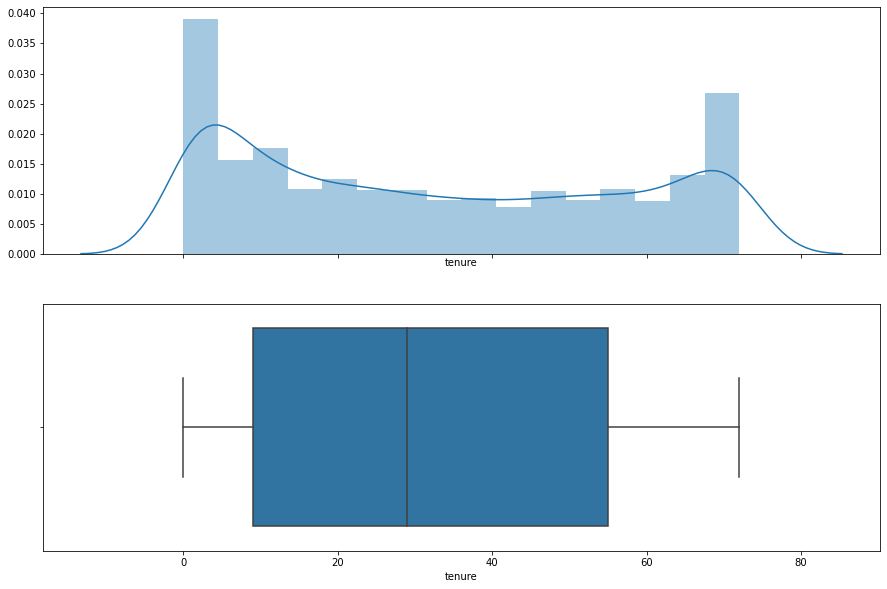

In [65]:
# Tenure
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10),sharex=True)
sns.distplot(df_Train['tenure'], ax=ax1)
sns.boxplot(df_Train['tenure'], ax=ax2)
print('Mean Tenure = %0.2f\nMedian Tenure = %0.2f' % (df_Train['tenure'].mean(),df_Train['tenure'].median()))

There are two peaks in the Tenure feature, one for customers with low tenure and one for customers with high tenure.

Mean Tenure No Churn: 37.6 
Mean Tenure Churn: 18.0


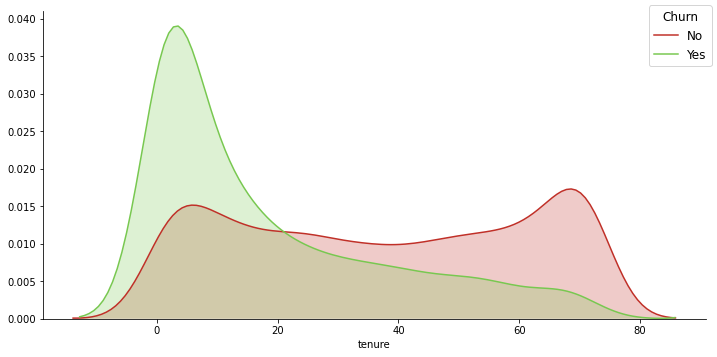

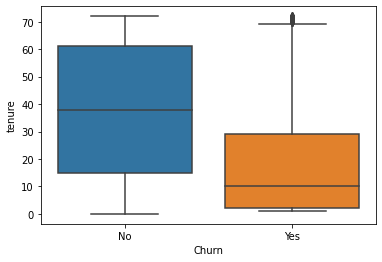

In [66]:
# Tenure - Churn
ax = sns.FacetGrid(df_Train, hue='Churn',palette=colors1,aspect=2,height=5)
ax = ax.map(sns.kdeplot, "tenure",shade= True)
ax.fig.legend(title='Churn',fontsize=12,title_fontsize=12)    
    
fig, ax = plt.subplots()
ax = sns.boxplot(x='Churn', y='tenure', data=df_Train)

T_0 = df_Train['tenure'][df_Train['Churn'] == 'No'].mean()
T_1 = df_Train['tenure'][df_Train['Churn'] == 'Yes'].mean()
print('Mean Tenure No Churn: %0.1f \nMean Tenure Churn: %0.1f' % (T_0,T_1))

The graphs show that Churning customers have a low Tenure with mean Tenure = 18 months. As the tenure increases customers tend to stay in the company.

Mean MonthlyCharges = 64.76
Median MonthlyCharges = 70.35


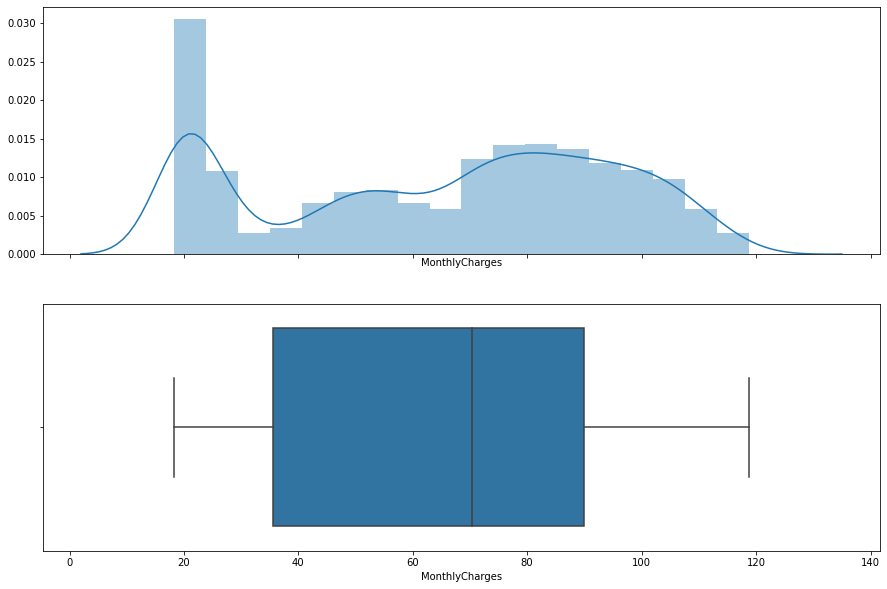

In [67]:
# MonthlyCharges
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10),sharex=True)
sns.distplot(df_Train['MonthlyCharges'], ax=ax1)
sns.boxplot(df_Train['MonthlyCharges'], ax=ax2)
print('Mean MonthlyCharges = %0.2f\nMedian MonthlyCharges = %0.2f' % (df_Train['MonthlyCharges'].mean(),df_Train['MonthlyCharges'].median()))

Mean MonthlyCharges No Churn: 61.3 
Mean MonthlyCharges Churn: 74.4


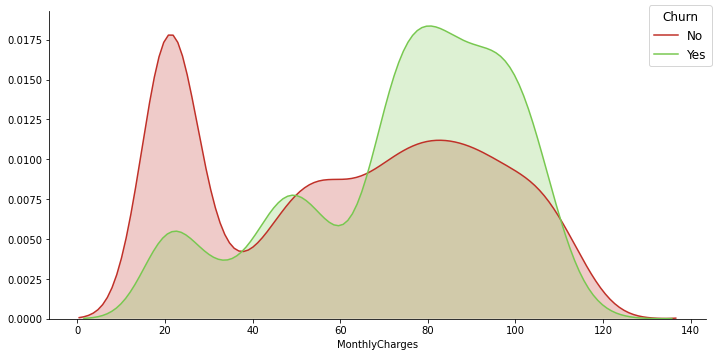

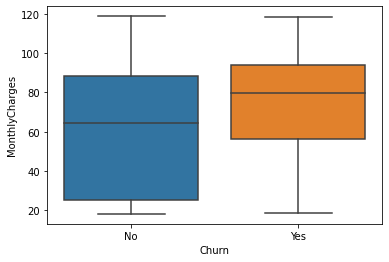

In [68]:
# MonthlyCharges - Churn
ax = sns.FacetGrid(df_Train, hue='Churn',palette=colors1,aspect=2,height=5)
ax = ax.map(sns.kdeplot, "MonthlyCharges",shade= True)
ax.fig.legend(title='Churn',fontsize=12,title_fontsize=12)    
    
fig, ax = plt.subplots()
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df_Train)

M_0 = df_Train['MonthlyCharges'][df_Train['Churn'] == 'No'].mean()
M_1 = df_Train['MonthlyCharges'][df_Train['Churn'] == 'Yes'].mean()
print('Mean MonthlyCharges No Churn: %0.1f \nMean MonthlyCharges Churn: %0.1f' % (M_0,M_1))

From the two highest peaks in the graphs we can say that customers with higher MonthlyCharges tend to leave the company.

Mean TotalCharges = 2283.30
Median TotalCharges = 1397.47


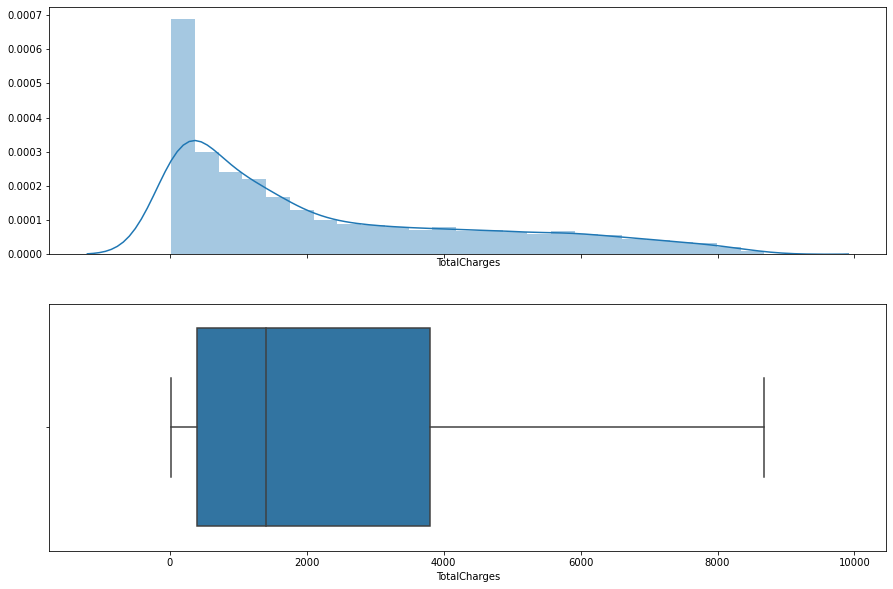

In [69]:
# TotalCharges
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10),sharex=True)
sns.distplot(df_Train['TotalCharges'], ax=ax1)
sns.boxplot(df_Train['TotalCharges'], ax=ax2)
print('Mean TotalCharges = %0.2f\nMedian TotalCharges = %0.2f' % (df_Train['TotalCharges'].mean(),df_Train['TotalCharges'].median()))

Mean TotalCharges No Churn: 2555.3 
Mean TotalCharges Churn: 1531.8


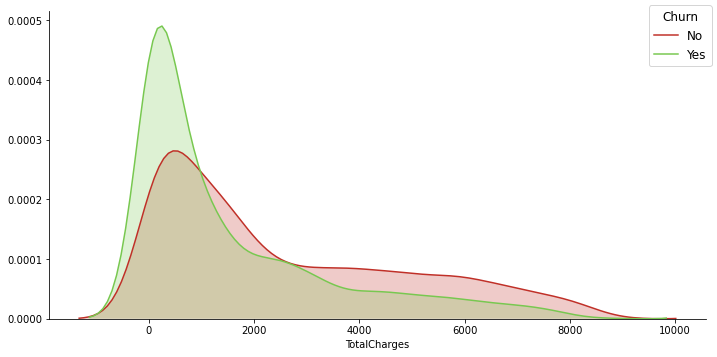

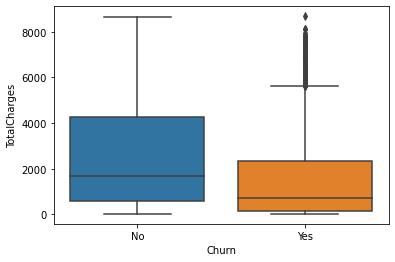

In [70]:
# TotalCharges - Churn
ax = sns.FacetGrid(df_Train, hue='Churn',palette=colors1,aspect=2,height=5)
ax = ax.map(sns.kdeplot, "TotalCharges",shade= True)
ax.fig.legend(title='Churn',fontsize=12,title_fontsize=12)    
    
fig, ax = plt.subplots()
ax = sns.boxplot(x='Churn', y='TotalCharges', data=df_Train)

TC_0 = df_Train['TotalCharges'][df_Train['Churn'] == 'No'].mean()
TC_1 = df_Train['TotalCharges'][df_Train['Churn'] == 'Yes'].mean()
print('Mean TotalCharges No Churn: %0.1f \nMean TotalCharges Churn: %0.1f' % (TC_0,TC_1))

Many customers with lower TotalCharges left the company. This seems odd but maybe these low TotalCharges are really high for customers with a low tenure and that lead to their decision to leave the company.

## 4. Feature Engineering ( Visualization )

Churn,No,Yes
OnlineServices,,
0,0.477633,0.522367
1,0.542443,0.457557
2,0.641820,0.358180
3,0.726297,0.273703
4,0.776995,0.223005
5,0.875657,0.124343
6,0.947183,0.052817
No Int. Service,0.925950,0.074050


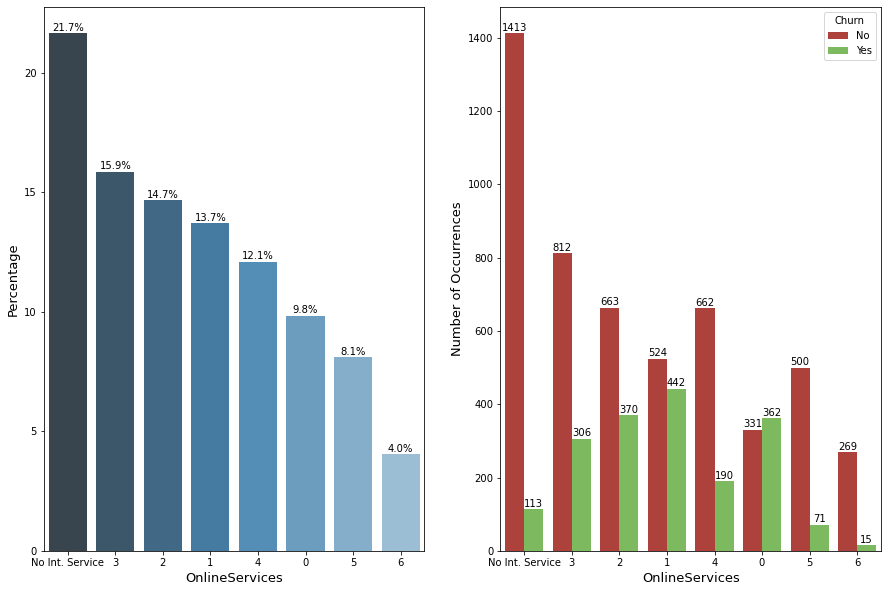

In [71]:
# Online Services 
IVs = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

OnlineServices = df_Train[IVs].replace({'No internet service':2,'No': 0, 'Yes': 1})
df_Train['OnlineServices'] = OnlineServices.sum(axis=1)
df_Train['OnlineServices'] = df_Train['OnlineServices'].replace({12:'No Int. Service'})

autoplot(df_Train['OnlineServices'],df_Train['Churn'],df_Train,colors1)
pd.crosstab(df_Train['OnlineServices'], df_Train['Churn']).apply(lambda r: r/r.sum(), axis=1)

There are 6 Online Services and those customers with no Internet Service. Looking at the Churning percentages we can say that as the number of Online Services, increases the number of Churned customers decreases. From 52.2% Churned customers with Internet Service and 0 Online Services to 0.05% Churned customers with Internet Service and 6 Online Services.

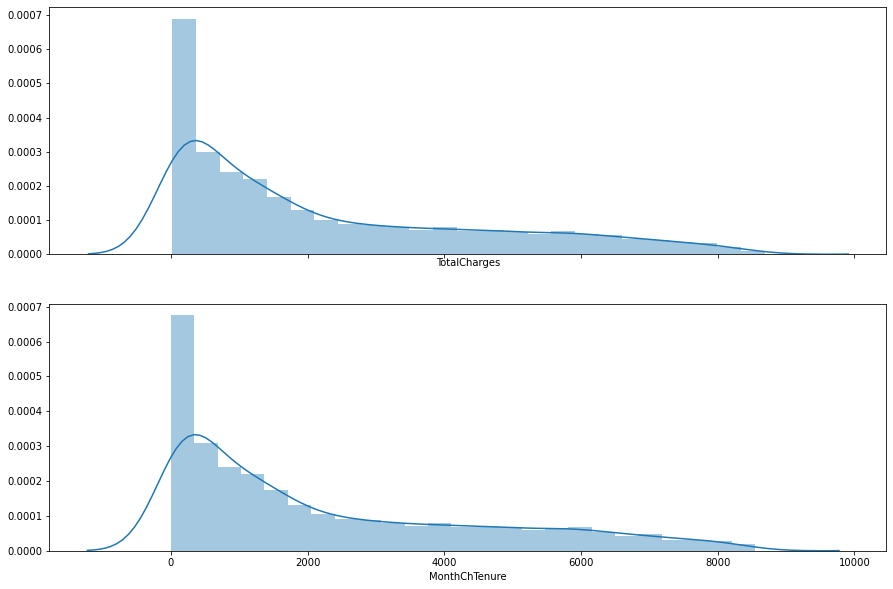

In [72]:
# MonthChTenure = MonthlyCharges * Tenure 
# MonthChTenure - TotalCharges
df_Train['MonthChTenure'] = df_Train['MonthlyCharges']*df_Train['tenure']

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10),sharex=True)
sns.distplot(df_Train['TotalCharges'], ax=ax1)
sns.distplot(df_Train['MonthChTenure'], ax=ax2)

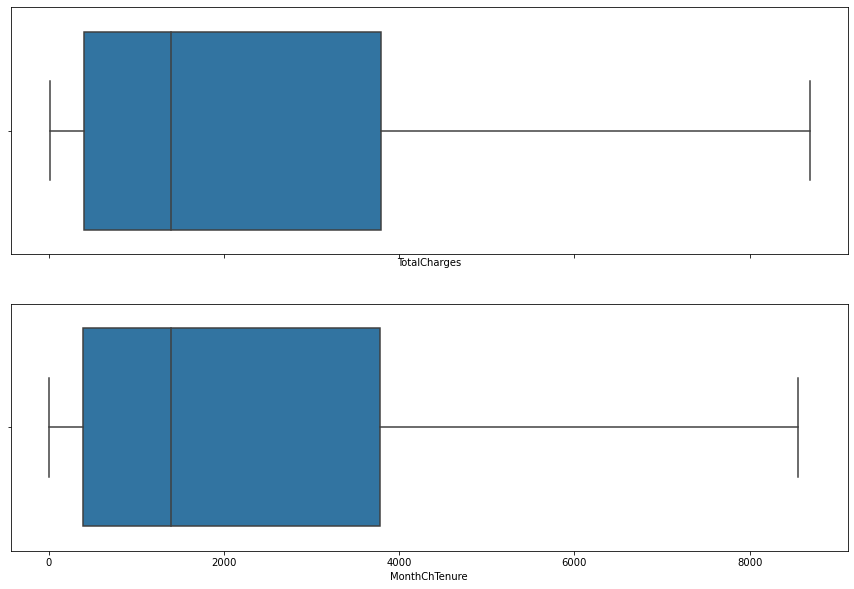

In [73]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10),sharex=True)
sns.boxplot(df_Train['TotalCharges'], ax=ax1)
sns.boxplot(df_Train['MonthChTenure'], ax=ax2)

We created the feature MonthChTenure by multiplying the Tenure feature with the MonthlyCharges feature. Then we compared it with the TotalCharges feature and we found that they are identical. So, we conclude that the TotalCharges feature includes the information of the Tenure and MonthlyCharges features.

In [74]:
# TotalCharges: Delete missing values
df_Train[df_Train['TotalCharges'].isnull()].loc[:,('MonthlyCharges','tenure')]

,MonthlyCharges,tenure
488,52.55,0
753,20.25,0
936,80.85,0
1082,25.75,0
1340,56.05,0
3331,19.85,0
3826,25.35,0
4380,20.00,0
5218,19.70,0
6670,73.35,0


TotalCharges feature has 11 missing values as we found earlier in this notebook. These missing values correspond to the customers with a tenure of 0 months. That probably means that these customers subscribed with the company during the last month and there is no overall information of their TotalCharges since they are less than 1 month in the company. We believe that these customers do not provide solid information that can be used in our model so we delete theses rows from our dataset. 

In [75]:
df_Train = df_Train.drop(df_Train['MonthlyCharges'][df_Train['TotalCharges'].isnull()].index)

## 5. Feature Engineering ( Encoding )

In [76]:
# Dataset split to Categorical (Nominal,Binary) and Numeric Vars
df_Cat_Bin = df_Train[['gender','Partner','SeniorCitizen','Dependents','PhoneService','PaperlessBilling']].iloc[:]
df_Cat_Nom = df_Train[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV','Contract','PaymentMethod']].iloc[:]
df_Num = df_Train[['tenure','MonthlyCharges','TotalCharges']].iloc[:]

# Categorical Output
y = df_Train['Churn'].iloc[:]

In [77]:
# LABEL ENCODING - ONE HOT ENCODING

# Categorical Binary Features Encoding
from sklearn.preprocessing import LabelEncoder
df_Cat_Bin_Ld = df_Cat_Bin.apply(LabelEncoder().fit_transform)

# Categorical Nominal Features Encoding
df_Cat_Nom_OHEd = pd.get_dummies(df_Cat_Nom)

# All Categorical Features
df_Cat = pd.concat([df_Cat_Bin_Ld,df_Cat_Nom_OHEd],axis=1)

# Categorical Outpout Encoding
y_Ld = y.replace({'No': 0, 'Yes': 1})

# ALL the Selected IVs
X = pd.concat([df_Num,df_Cat],axis=1)
columns=X.columns
X.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,SeniorCitizen,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer Auto,PaymentMethod_Credit card Auto,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0


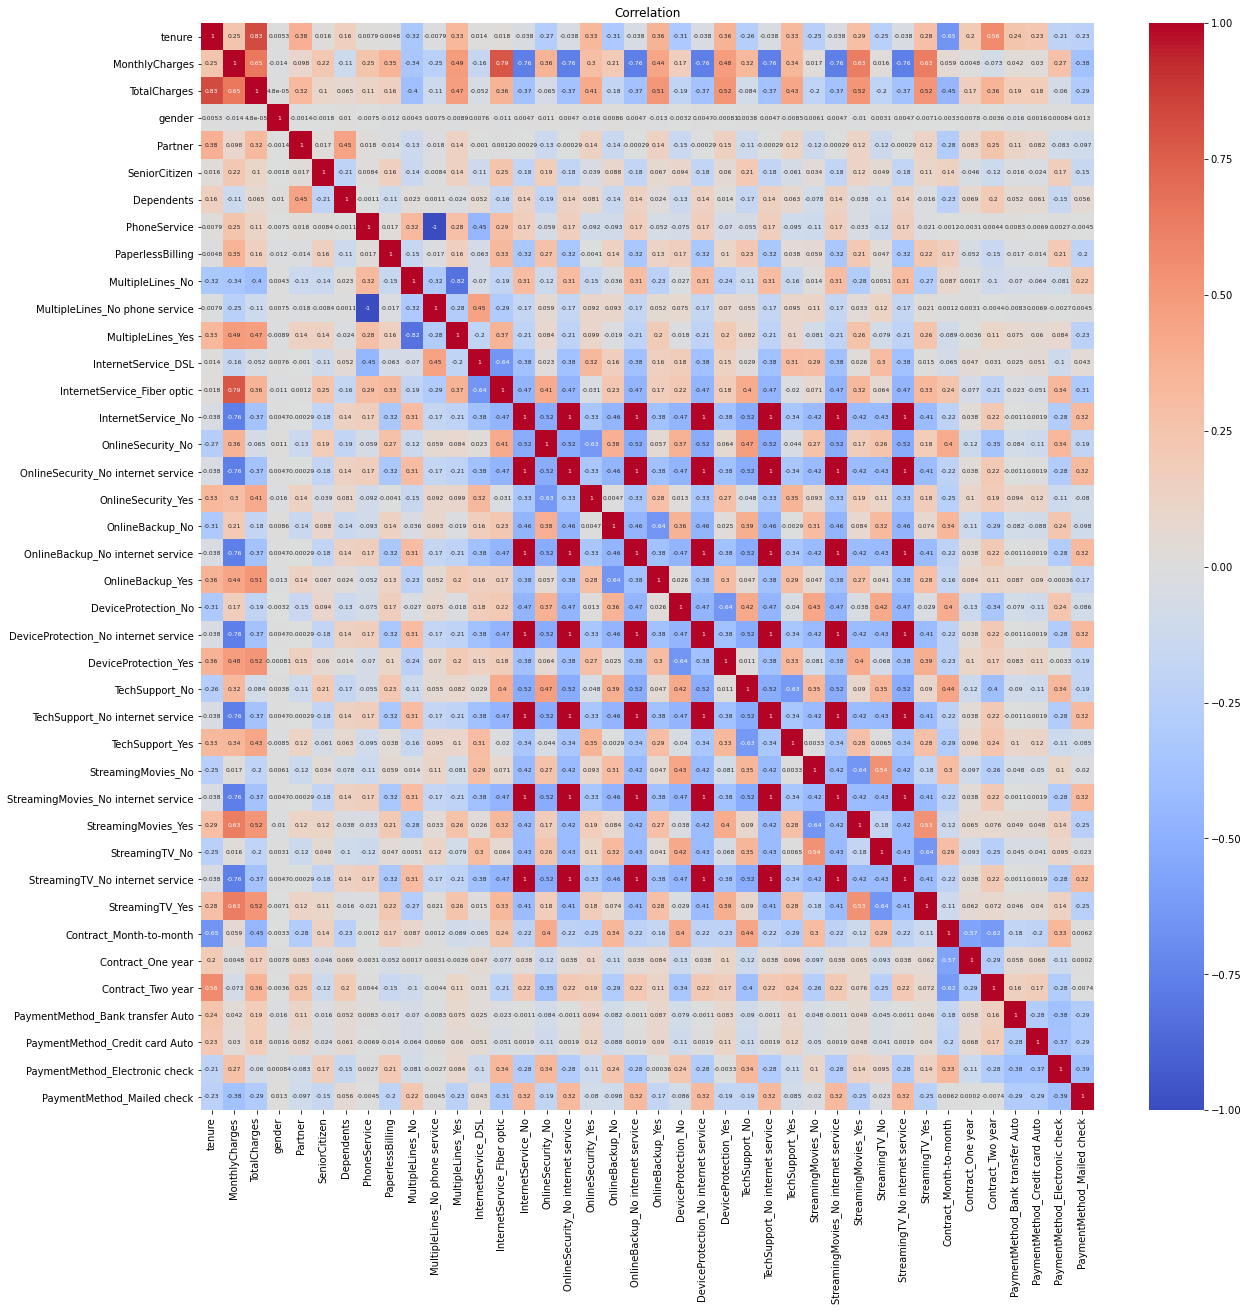

In [78]:
# Correlation Matrix
plt.figure(figsize=(20, 20))
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap = "coolwarm",annot=True,annot_kws = {'size': 6})
plt.title("Correlation")
plt.show()

In [79]:
X = X.drop(columns=['OnlineSecurity_No internet service','OnlineBackup_No internet service',
                    'DeviceProtection_No internet service','TechSupport_No internet service',
                    'StreamingMovies_No internet service','StreamingTV_No internet service'])

X = X.drop(columns=['PhoneService'])

X = X.drop(columns=['TotalCharges'])

- There is no need to keep the features with No Internet Service since they correspond to the same feature. So, we can only keep the InternetService_No and drop the others.

- We also drop PhoneService feature since its informtion is included to the MultipleLines feature.

- We drop TotalCharges feature since its info corresponds to the MonthlyCharges and Tenure features. We coud also drop the last two instead but deleting TotalCharges gave us better results.

In [80]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_Ld, test_size = 0.2, random_state = 0)

In [81]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
# Choosing Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [83]:
# Used GridSearchCV for parameter tuning
CF = [None]*9
Names = ['Logistic Regression','SVM linear','SVM rbf','Naive Bayes','kNN','Decision Tree','Random Forest','Gradient Boosting','Ada Boost']
CF[0] = LogisticRegression(solver='newton-cg')
CF[1] = SVC(kernel = 'linear', random_state = 0,probability=True)
CF[2] = SVC(kernel = 'rbf', random_state = 0,probability=True)
CF[3] = GaussianNB()
CF[4] = KNeighborsClassifier(n_neighbors=20,metric='minkowski')
CF[5] = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,random_state = 0)
CF[6] = RandomForestClassifier(n_estimators=150,min_samples_split=4,max_depth=9,min_samples_leaf=2,random_state = 0)
CF[7] = GradientBoostingClassifier(loss='exponential',min_samples_leaf=2,learning_rate=0.05,random_state = 0)
CF[8] = AdaBoostClassifier(random_state = 0)

We first used GridSearchCV to tune some of hyperparameters.

In [84]:
# Classification Metrics
Classifiers = ['Logistic Regression','SVM linear','SVM rbf','Naive Bayes','k-NN','Decision Tree','Random Forest','Gradient Boosting','Ada Boost']
Cols = ['Accuracy','Recall','Precision','f1 score','AUC ROC score']
Scores = pd.DataFrame(index=Classifiers,columns=Cols).astype('float')
for i in range(len(CF)):
    classifier = CF[i]
    classifier.fit(X_train, y_train)
    c_probs = classifier.predict_proba(X_test)
    c_probs = c_probs[:, 1]
    
    y_pred = classifier.predict(X_test)
    
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
    Scores.Accuracy[i] = accuracy_score(y_test,y_pred)
    Scores.Recall[i] = recall_score(y_test,y_pred)
    Scores.Precision[i] = precision_score(y_test,y_pred)
    Scores['f1 score'][i] = f1_score(y_test,y_pred)
    Scores['AUC ROC score'][i] = roc_auc_score(y_test,c_probs)
    
print(Scores)

                     Accuracy    Recall  Precision  f1 score  AUC ROC score
Logistic Regression  0.801706  0.528455   0.650000  0.582960       0.835267
SVM linear           0.805259  0.544715   0.654723  0.594675       0.829875
SVM rbf              0.802416  0.490515   0.667897  0.565625       0.791444
Naive Bayes          0.731343  0.791328   0.492411  0.607069       0.825278
k-NN                 0.784648  0.509485   0.606452  0.553756       0.815813
Decision Tree        0.788202  0.569106   0.601719  0.584958       0.826980
Random Forest        0.800995  0.506775   0.656140  0.571865       0.843237
Gradient Boosting    0.806681  0.504065   0.676364  0.577640       0.843257
Ada Boost            0.802416  0.533875   0.650165  0.586310       0.839828


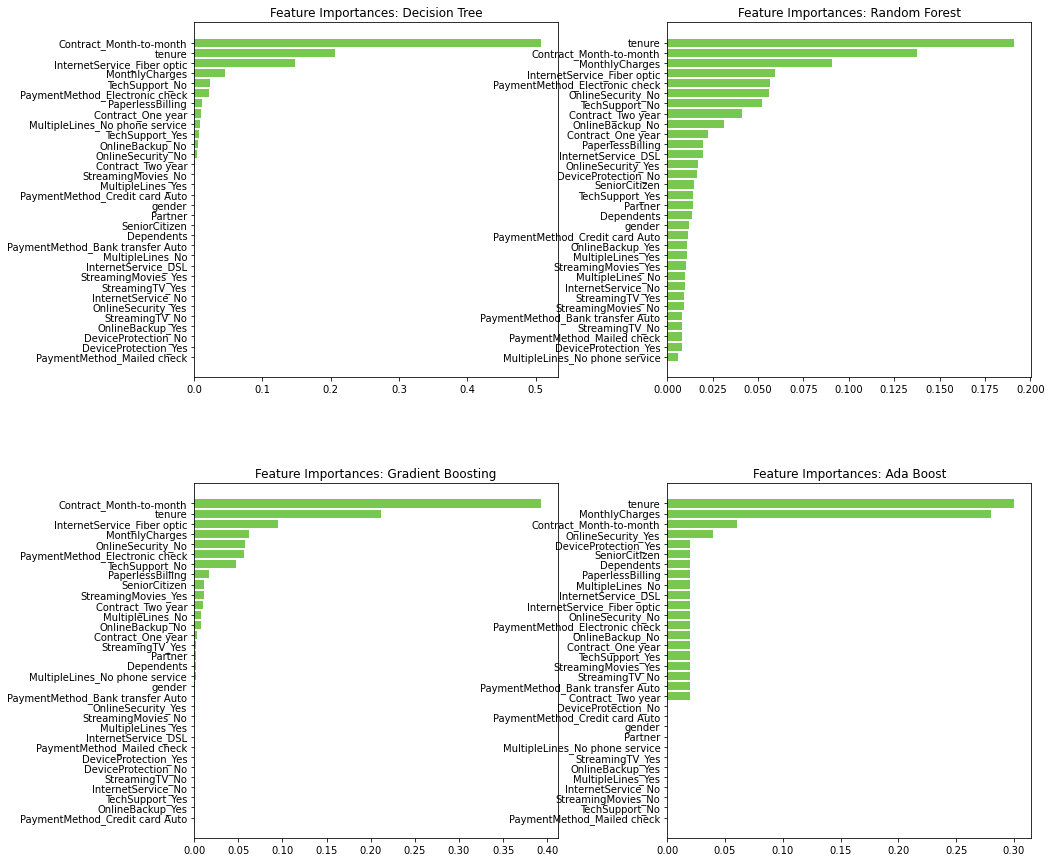

In [85]:
# Feature Importance plots
columns=X.columns
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(4):
    plt.subplot(2, 2, i+1)
    classifier = CF[i+5]
    classifier.fit(X_train, y_train)     

    FImportances = pd.DataFrame(data=classifier.feature_importances_,index=columns,columns=['Importance']).sort_values(by=['Importance'])
    plt.barh(range(FImportances.shape[0]),FImportances['Importance'],color = '#78C850')
    plt.yticks(range(FImportances.shape[0]), FImportances.index)
    plt.title('Feature Importances: %s' % (Names[i+5]))

From the Feature Importances plots we can say that the type of contract, MonthlyCharges, tenure and InternetService play a key role in the customer's decision to leave or not the company.

## 6. Evaluation

#### Receiver Operating Characteristic (ROC) Curve
The Receiver Operating Characteristic Curve, better known as the ROC Curve, is an excellent method for measuring the performance of a Classification model. It tells how much model is capable of distinguishing between classes. The True Positive Rate (TPR) is plot against False Positive Rate (FPR) for the probabilities of the classifier predictions. Then, the area under the plot is calculated.

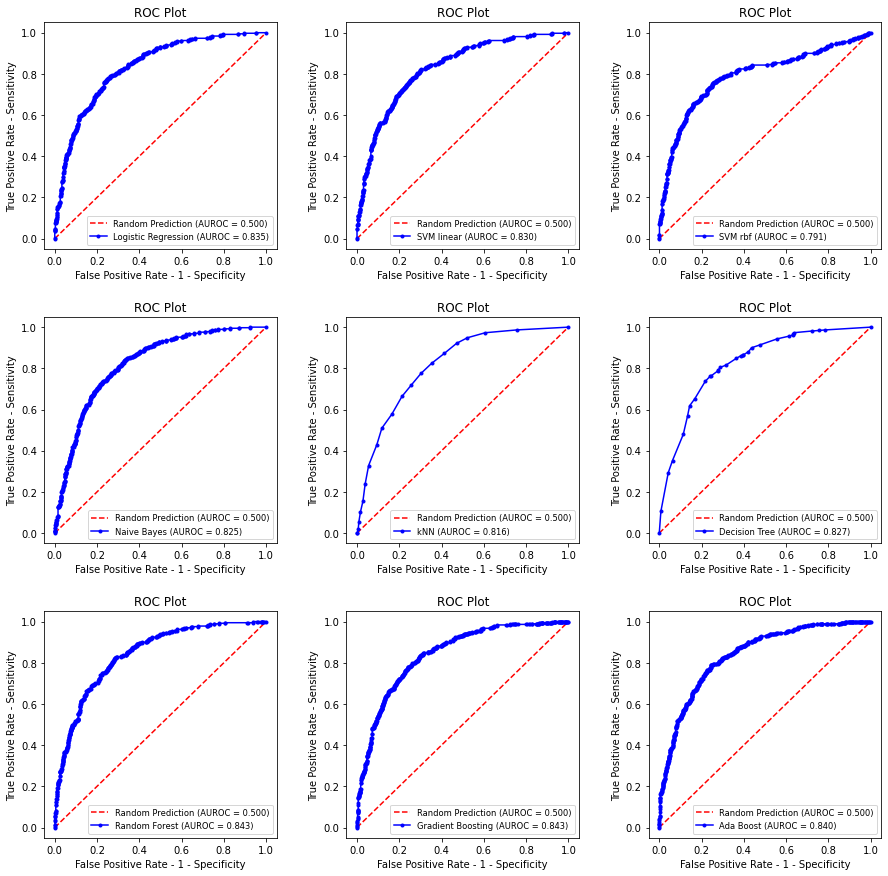

In [86]:
# ROC - Curves for models
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)    
for i in range(len(CF)):
    plt.subplot(3, 3, i+1)

    classifier = CF[i]
    classifier.fit(X_train, y_train)  
     
    # Predict probabilities
    r_probs = [0 for _ in range(len(y_test))]
    c_probs = classifier.predict_proba(X_test)

    # Keep probabilities for the positive outcome only
    c_probs = c_probs[:, 1]

    # Calculate AUROC
    from sklearn.metrics import roc_curve, roc_auc_score, auc
    r_auc = roc_auc_score(y_test, r_probs)
    c_auc = roc_auc_score(y_test, c_probs)

    # Calculate ROC curve
    r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
    c_fpr, c_tpr, _ = roc_curve(y_test, c_probs)
    plt.plot(r_fpr, r_tpr, linestyle='--',c='r', label='Random Prediction (AUROC = %0.3f)' % r_auc)
    plt.plot(c_fpr, c_tpr, marker='.',c='b', label='%s (AUROC = %0.3f)' % (Names[i],c_auc))

    plt.title('ROC Plot')
    plt.xlabel('False Positive Rate - 1 - Specificity')
    plt.ylabel('True Positive Rate - Sensitivity')
    plt.legend(fontsize='small')

The highest the AUC, the better the model is at distinguishing between customer Churn or not. Random Forest Classifier and Gradient Boosting have the highest AUC both with 0.843.

#### Cumulative Accuracy Profile (CAP) Curve
The CAP Curve tries to analyse how to effectively identify all data points of a given class using minimum number of tries.

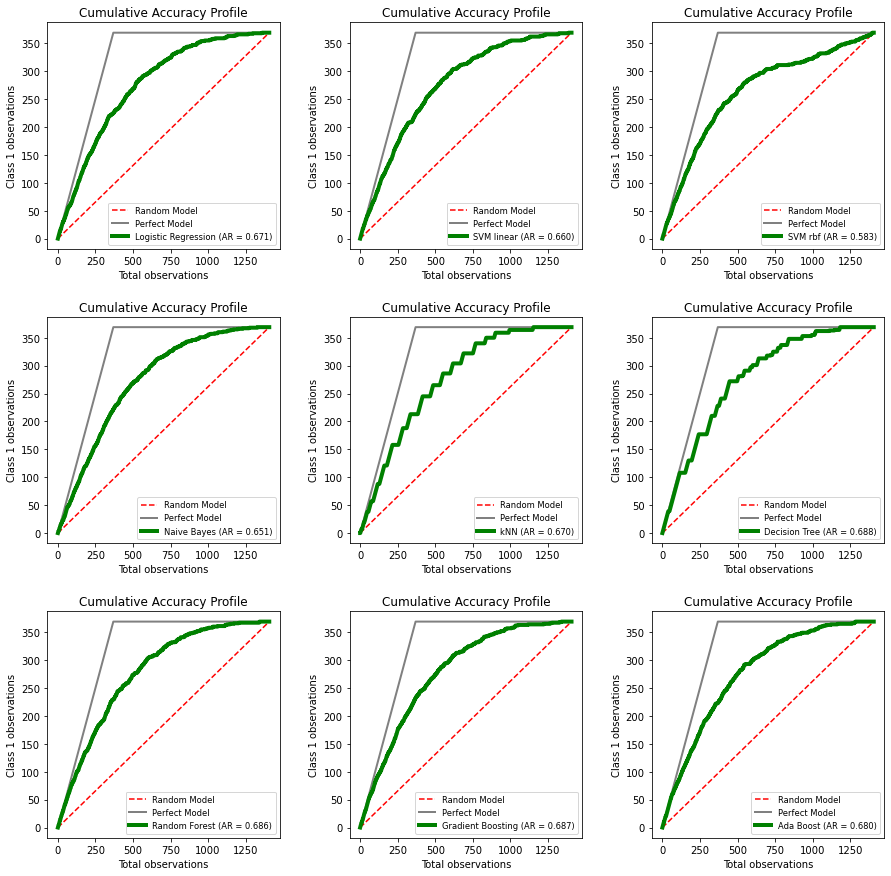

In [87]:
# Cap Curve
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)    
for i in range(len(CF)):
    plt.subplot(3, 3, i+1)
    
    total = len(y_test)
    class_1_count = np.sum(y_test)
    class_0_count = total - class_1_count

    plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

    plt.plot([0, class_1_count, total], 
             [0, class_1_count, class_1_count], 
             c = 'grey', linewidth = 2, label = 'Perfect Model')

    classifier = CF[i]
    classifier.fit(X_train, y_train)  
    c_probs = classifier.predict_proba(X_test)

    # Keep probabilities for the positive outcome only
    c_probs = c_probs[:, 1]

    model_y = [y for _, y in sorted(zip(c_probs, y_test), reverse = True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total + 1)

    from sklearn.metrics import auc
    # Area under Random Model
    a = auc([0, total], [0, class_1_count])

    # Area between Perfect and Random Model
    aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a

    # Area between Trained and Random Model
    aR = auc(x_values, y_values) - a

    AR = aR / aP

    plt.plot(x_values, y_values, c = 'g', label = '%s (AR = %0.3f)' % (Names[i],AR), linewidth = 4)

    # Plot information
    plt.xlabel('Total observations')
    plt.ylabel('Class 1 observations')
    plt.title('Cumulative Accuracy Profile')
    plt.legend(fontsize='small')

Decision Tree has the highest AUC with 0.688 and then Random Forest and Gradient Boosting follow with 0.686 and 0.687 respectively.

As an conclusion our choice would fall between the Random Forest and Gradient Boosting.